In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
df=pd.read_csv(r"C:\Users\vishnuteja\Documents\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [15]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [16]:
df.shape

(440, 8)

In [17]:
uv = df['Channel'].unique()

In [18]:
uv

array([2, 1], dtype=int64)

In [19]:
uv = df['Region'].unique()

In [20]:
uv

array([3, 1, 2], dtype=int64)

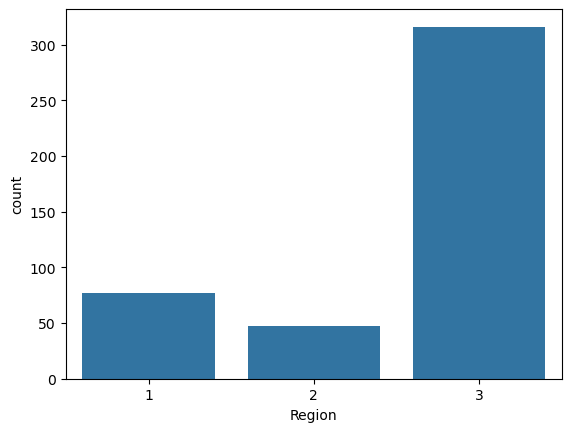

In [21]:
sns.countplot(x=df['Region'])
plt.show()

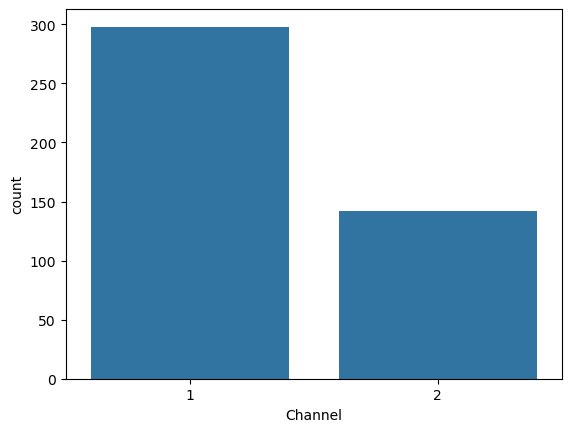

In [22]:
sns.countplot(x=df['Channel'])
plt.show()

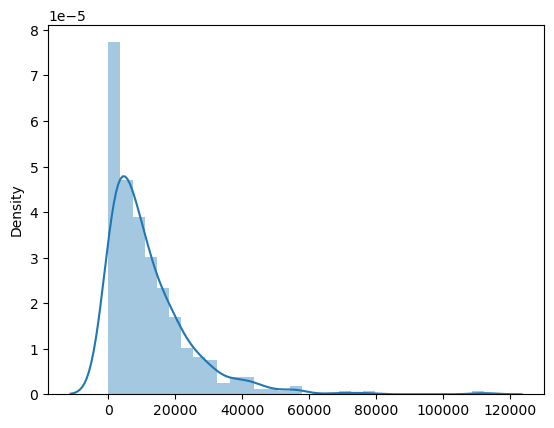

In [23]:
sns.distplot(x=df['Fresh'])
plt.show()

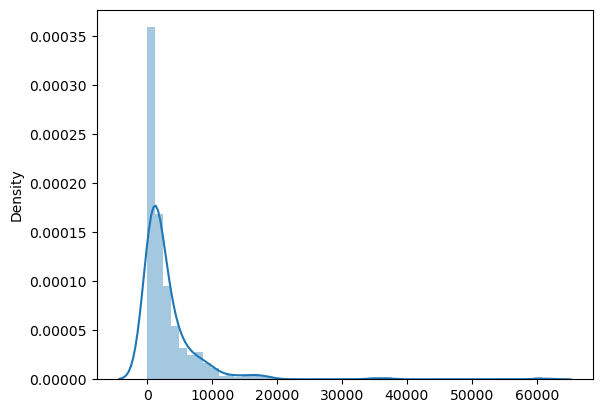

In [24]:
sns.distplot(x=df['Frozen'])
plt.show()

In [25]:
 df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df[['Channel']]

,Channel
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [27]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df)

In [30]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [31]:
import scipy.cluster.hierarchy as sch

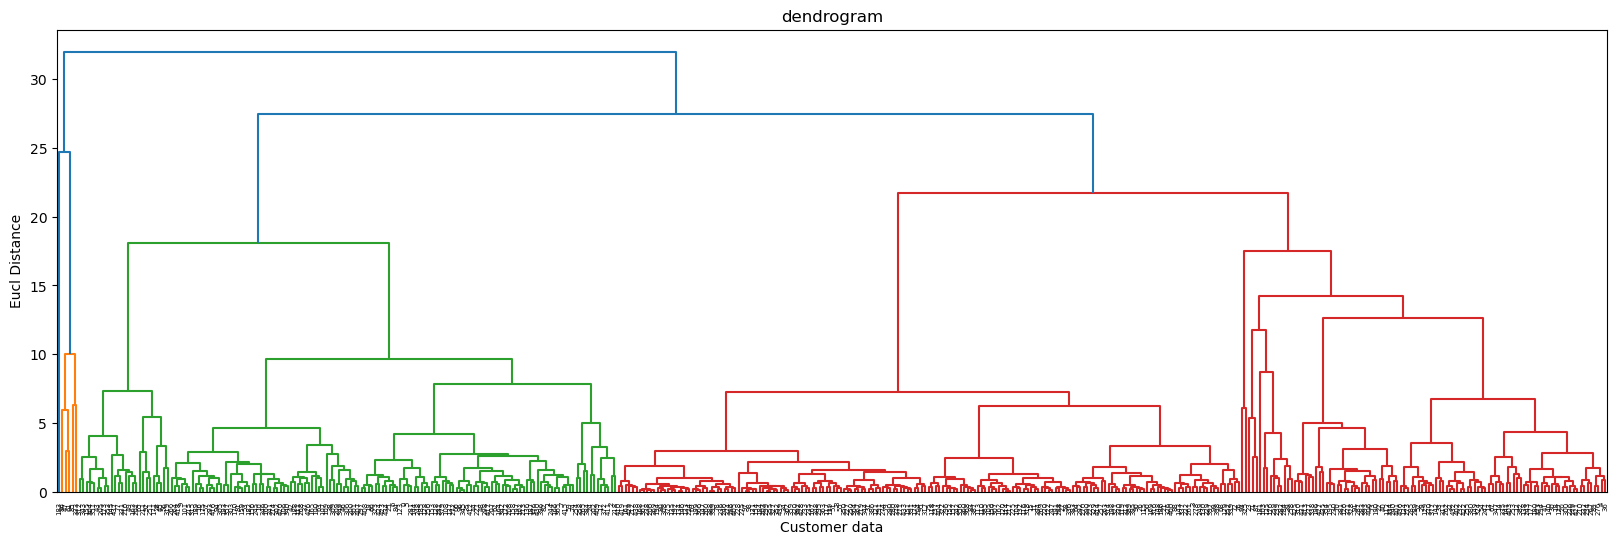

In [32]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [33]:
len(set(dendo['color_list']))-1

3

In [34]:
from sklearn.cluster import AgglomerativeClustering


In [35]:
model = AgglomerativeClustering(n_clusters=3)
cluster = model.fit_predict(X)

In [36]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [37]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [38]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [39]:
cgd=pd.concat([df,group_num],axis=1)
cgd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [41]:
# Kmeans

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range (2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [51]:
wcss

[2266.9552665832452,
 1644.0598512347563,
 1326.674608213553,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388117,
 791.8280762163156,
 710.1943394067517,
 668.2225054846901]

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

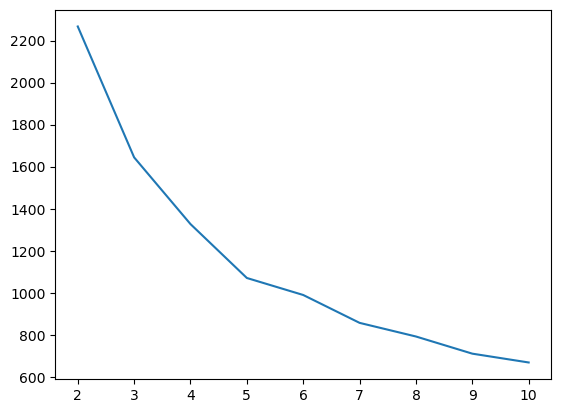

In [53]:
plt.plot(range(2,11),wcss)
plt.tittle()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
model=KMeans(n_clusters=4, random_state=42)
groups=model.fit_predict(X)
groups


array([3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3,

In [57]:
groups.shape

(440,)

In [59]:
ckd=pd.concat([df,group_num],axis=1)
ckd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [61]:
silhouette_score(X,groups)

0.34939129340421093

In [67]:
model=KMeans(n_clusters=5, random_state=42)
group=model.fit_predict(X)
group


array([3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [69]:
group.shape

(440,)

In [71]:
silhouette_score(X,group)

0.36890127429678043